In [3233]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def w_calculate(W, matrix):
    for i in range(len(matrix)):
        sum = np.prod(matrix[i])
        W.append(sum ** (1/(len(matrix))))

def sum_of_columns(SUM, matrix, W):
    for j in range(len(matrix)):
        sum = 0
        for i in range(len(matrix)):
            sum += matrix[i][j]
        SUM.append(sum)
    SUM.append(np.sum(W))

def wnorm_calculate(wnorm, w, SUM):
    for i in w:
        wnorm.append(i/SUM[-1])
    SUM.append(round(np.sum(wnorm)))

def lambda_calculate(SUM, Wnorm):
    result = 0
    for i in range(len(Wnorm)):
        result += SUM[i] * Wnorm[i]
    return result

def consistencyIndex_calculate(lam, num):
    return ((lam - num) / (num - 1))

def consistencyRelations_calculate(consistencyIndex, averageIndex):
    return (consistencyIndex / averageIndex)

def globalPriorities_calculate(Wnorm, Wnorm_alt, index):
    result = 0
    for i in range(len(Wnorm)):
        result += Wnorm[i] * Wnorm_alt[i][index]
    return result

def max_alternativ(Wnorm_alt, i):
    print('За критерієм K', (i + 1), 'найвищий пріоритет має альтернатива A', Wnorm_alt[i].index(max(Wnorm_alt[i])) + 1, 'зі значенням', (round(max(Wnorm_alt[i]), 2)))

def output_1D_array(matrix):
    for item in matrix:
        print(f"{round(item, 2)}\t", end='')
    print(end = '\n\n')

def output_2D_array(matrix):
    for row in matrix:
        for item in row:
            print(f"{round(item, 2)}\t", end='')
        print()
    print()

def output_3D_array(matrix):
    for row in matrix:
        for item in row:
            for i in item:
                for j in i:
                    print(f"{round(j, 2)}\t", end='')
                print( )
            print()

def graph(x, y, title):
    plt.figure(figsize=(12, 6))

    sns.barplot(x=list(x), y=list(y), palette='viridis')

    plt.title(title)

    plt.show()

In [3234]:
df = pd.read_excel('lab2.xlsx', sheet_name='Лист1')

criteria = df.iloc[0:9,1:10].values

print('Попарні оцінки суджень:')
output_2D_array(criteria)

Попарні оцінки суджень:
1.0	2.0	3.0	4.0	5.0	6.0	7.0	8.0	9.0	
0.5	1.0	2.0	3.0	4.0	5.0	6.0	7.0	8.0	
0.33	0.5	1.0	2.0	3.0	4.0	5.0	6.0	7.0	
0.25	0.33	0.5	1.0	2.0	3.0	4.0	5.0	6.0	
0.2	0.25	0.33	0.5	1.0	2.0	3.0	4.0	5.0	
0.17	0.2	0.25	0.33	0.5	1.0	2.0	3.0	4.0	
0.14	0.17	0.2	0.25	0.33	0.5	1.0	2.0	3.0	
0.12	0.14	0.17	0.2	0.25	0.33	0.5	1.0	2.0	
0.11	0.12	0.14	0.17	0.2	0.25	0.33	0.5	1.0	



In [3235]:
W = list()
w_calculate(W, criteria)

print('Компонент власного вектору матриці W:')
output_1D_array(W)

Компонент власного вектору матриці W:
4.15	3.01	2.11	1.46	1.0	0.69	0.47	0.33	0.24	



In [3236]:
SUM = list()

sum_of_columns(SUM, criteria, W)

print('Сума:')
output_1D_array(SUM)

Сума:
2.83	4.72	7.59	11.45	16.28	22.08	28.83	36.5	45.0	13.46	



In [3237]:
Wnorm = list()

wnorm_calculate(Wnorm, W, SUM)

print('Нормований вектор матриці попарних порівнянь Wнорм:')
output_1D_array(Wnorm)
print('Сума:')
output_1D_array(SUM)

Нормований вектор матриці попарних порівнянь Wнорм:
0.31	0.22	0.16	0.11	0.07	0.05	0.04	0.02	0.02	

Сума:
2.83	4.72	7.59	11.45	16.28	22.08	28.83	36.5	45.0	13.46	1	



In [3238]:
print('Найбільш пріоритетним критерієм є: K', (Wnorm.index(max(Wnorm))) + 1, 'зі значенням', (round(max(Wnorm), 2)))

Найбільш пріоритетним критерієм є: K 1 зі значенням 0.31


In [3239]:
lam = lambda_calculate(SUM, Wnorm)
print('Власне значення матриці:', round(lam, 3))

Власне значення матриці: 9.415


In [3240]:
consistencyIndex = consistencyIndex_calculate(lam, len(Wnorm))
print('Індекс узгодженості:', round(consistencyIndex, 3))

Індекс узгодженості: 0.052


In [3241]:
averageIndex = df.at[3, 'Unnamed: 15']
print('Середнє значення індексу узгодженості:', averageIndex)

Середнє значення індексу узгодженості: 1.45


In [3242]:
consistencyRelations = consistencyRelations_calculate(consistencyIndex, averageIndex)
print('Відношення узгодженості:', round(consistencyRelations, 3))

Відношення узгодженості: 0.036


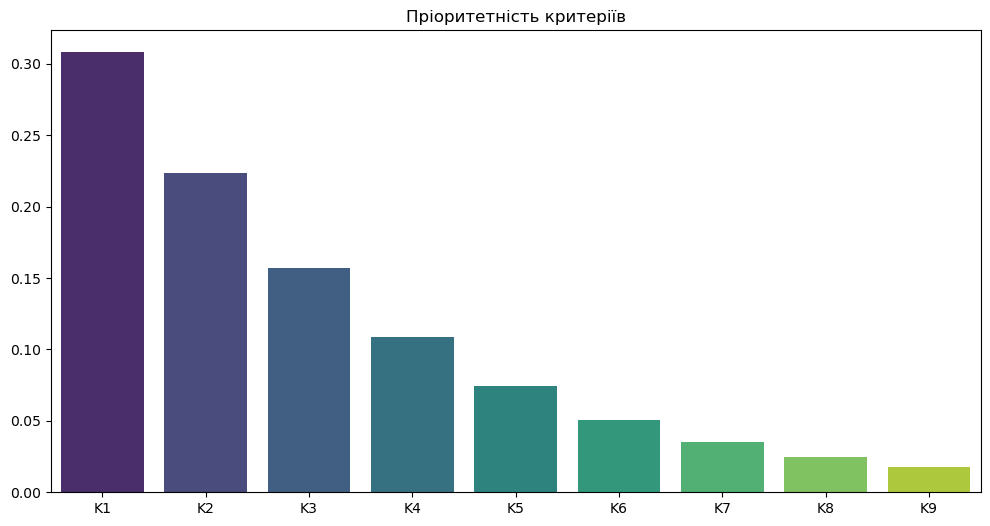

In [3243]:
example = [item[0].strip("[]'") for item in df.iloc[0:9, 0:1].values]

graph(example, Wnorm, 'Пріоритетність критеріїв')

In [3244]:
df = pd.read_excel('lab2.xlsx', sheet_name='Лист2')
alternatives = []
for i in range(len(criteria)):
    alternatives.append([df.iloc[((i * 7) + 1):((i * 7) + 4), 1:4].values])
alternatives = np.array(alternatives)

#output_3D_array(alternatives)

In [3245]:
W_alt = []
for i in range(len(alternatives)):
    temp = list()
    w_calculate(temp, alternatives[i][0])
    W_alt.append(temp)

#print('Компонент власного вектору матриці W:')
#output_2D_array(W_alt)

In [3246]:
SUM_alt = []

for i in range(len(alternatives)):
    temp = list()
    sum_of_columns(temp, alternatives[i][0], W_alt[i])
    SUM_alt.append(temp)

#print('Сума:')
#output_2D_array(SUM_alt)

In [3247]:
Wnorm_alt = []

for i in range(len(alternatives)):
    temp = list()
    wnorm_calculate(temp, W_alt[i], SUM_alt[i])
    Wnorm_alt.append(temp)

#print('Нормований вектор матриці попарних порівнянь Wнорм:')
#output_2D_array(Wnorm_alt)
#print()
#print('Сума:')
#output_2D_array(SUM_alt)

In [3248]:
#for i in range(len(alternatives)):
#    max_alternativ(Wnorm_alt, i)

In [3249]:
lam_alt = []

for i in range(len(alternatives)):
    lam_alt.append(lambda_calculate(SUM_alt[i], Wnorm_alt[i]))

#print('Власне значення матриці:')
#print(lam_alt)

In [3250]:
consistencyIndex_alt = []

for i in range(len(alternatives)):
    consistencyIndex_alt.append(consistencyIndex_calculate(lam_alt[i], len(Wnorm_alt[i])))

#print('Індекс узгодженості:')
#print(consistencyIndex_alt)

In [3251]:
averageIndex_alt = df.at[2, 'Unnamed: 9']
#print('Середнє значення індексу узгодженості:', averageIndex_alt)

In [3252]:
consistencyRelations_alt = []

for i in range(len(alternatives)):
    consistencyRelations_alt.append(consistencyRelations_calculate(consistencyIndex_alt[i], averageIndex_alt))

#print('Відношення узгодженості:')
#print(consistencyRelations_alt)

In [3253]:
example = [item[0].strip("[]'") for item in df.iloc[1:4, 0:1].values]


Пріоритетність альтернатив за критерією K 6
1	3	5	
0.33	1	2	
0.2	0.5	1	

Компонент власного вектору матриці W:
2.47	0.87	0.46	

Сума:
1.53	4.5	8	3.8	1	

Нормований вектор матриці попарних порівнянь Wнорм:
0.65	0.23	0.12	

За критерієм K 6 найвищий пріоритет має альтернатива A 1 зі значенням 0.65

Власне значення матриці: 3.004

Індекс узгодженості: 0.002

Середнє значення індексу узгодженості: 0.58

Відношення узгодженості: 0.003



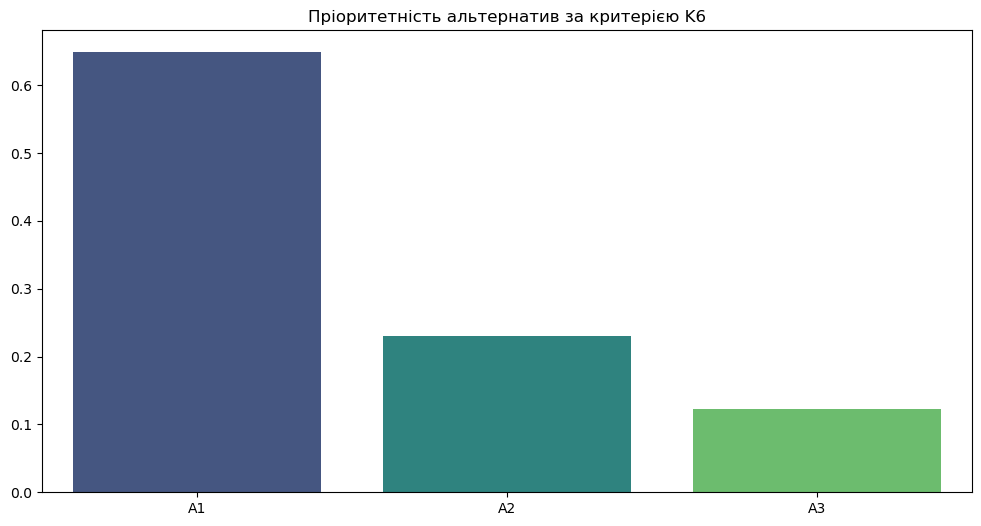

In [3259]:
index = 5
print('Пріоритетність альтернатив за критерією K', index+1)
output_2D_array(alternatives[index][0])
print('Компонент власного вектору матриці W:')
output_1D_array(W_alt[index])
print('Сума:')
output_1D_array(SUM_alt[index])
print('Нормований вектор матриці попарних порівнянь Wнорм:')
output_1D_array(Wnorm_alt[index])
max_alternativ(Wnorm_alt, index)
print()
print('Власне значення матриці:', round(lam_alt[index], 3), end = '\n\n')
print('Індекс узгодженості:', round(consistencyIndex_alt[index], 3), end = '\n\n')
print('Середнє значення індексу узгодженості:', averageIndex_alt, end = '\n\n')
print('Відношення узгодженості:', round(consistencyRelations_alt[index], 3), end = '\n\n')
graph(example, Wnorm_alt[index], 'Пріоритетність альтернатив за критерією K' + str(index+1))

[0.18998492809020887, 0.4117246642769549, 0.3982904076328362]


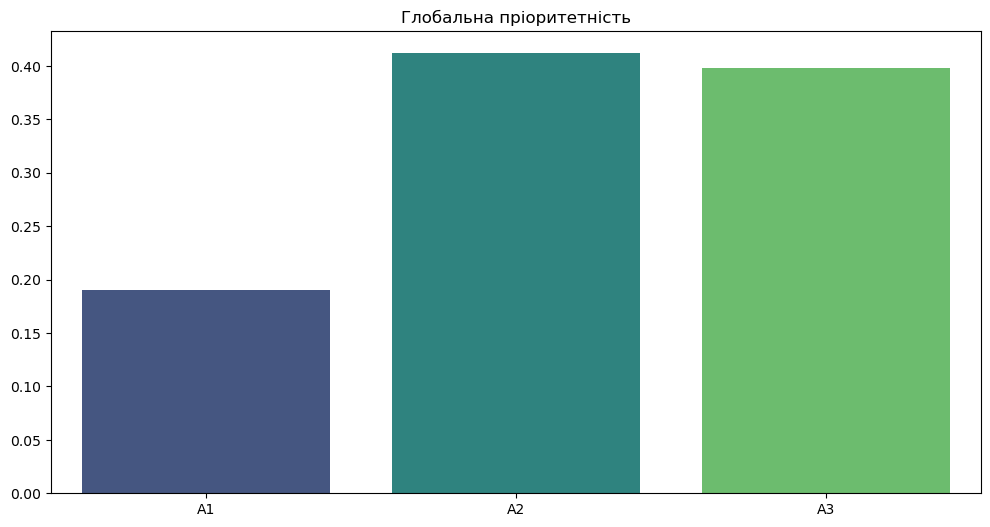

In [3255]:
globalPriorities = []

for i in range(len(example)):
    globalPriorities.append(globalPriorities_calculate(Wnorm, Wnorm_alt, i))

print(globalPriorities)

graph(example, globalPriorities, 'Глобальна пріоритетність')